In [1]:

import nltk # langg processing 
from nltk.corpus import stopwords    

import numpy as np      # numerical calucaltion   
import pandas as pd        # dataframe prociing 
import matplotlib.pyplot as plt    # visualtionnn 
%matplotlib inline             

from wordcloud import WordCloud    

# Downloading NLTK data
nltk.download('stopwords')    
nltk.download('punkt')        


C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_25316\3002738369.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd        # dataframe prociing
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VAISHNAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VAISHNAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load the Data

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,spam,Celebrate Valentine Day with B1G1 Offer ! Val...
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


<h1>Data Cleaning</h1>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


 Drop the Columns 

In [5]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,spam,Celebrate Valentine Day with B1G1 Offer ! Val...
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


Rename the Column


In [6]:
  # Rename the columns name
df.columns  = ['target', 'text']

df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,spam,Celebrate Valentine Day with B1G1 Offer ! Val...
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


Convert the target variable in Categorical Data

In [7]:
# categorical variable (google) (0/1  -   T/F) 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [8]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,1,Celebrate Valentine Day with B1G1 Offer ! Val...
2,0,Ok lar... Joking wif u oni...
3,1,Free entry in 2 a wkly comp to win FA Cup fina...
4,0,U dun say so early hor... U c already then say...


Check Missing values in dataset

In [9]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

Check Duplicate values in datsaet

In [10]:
#check duplicate values
df.duplicated().sum()

415

Remove Duplicate Data

In [11]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

In [12]:
df.shape   # shape of the datataset which is not null and dublicate 

(5158, 2)

<h3>Exploratory Data Analysis</h3> ( EDA )

Percentage of Ham and Spam

In [13]:

#Exploratory Data Analysis - data explaore and fetch meaning insights / info from data 
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.55331523846452
percentage of 1 : 12.44668476153548


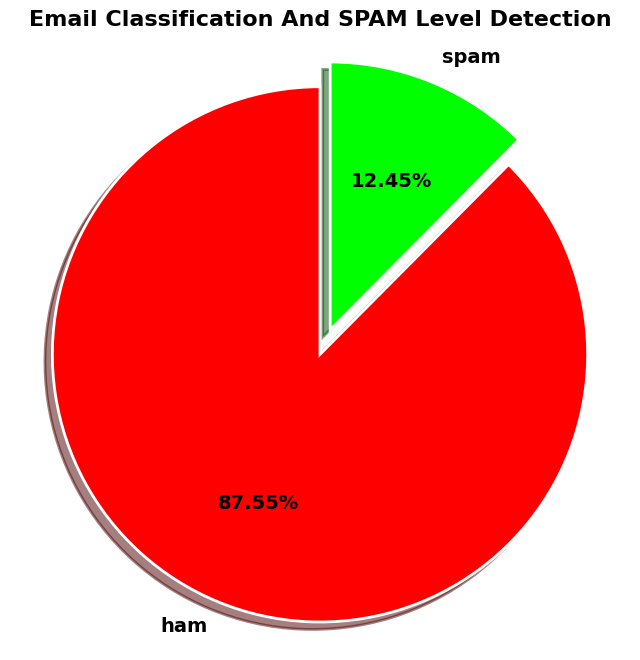

In [14]:
import matplotlib.pyplot as plt
 

# Define custom colors
colors = ['#FF0000', '#00FF00']

explode = (0, 0.1)   

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,   
    shadow=True   
)

for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification And SPAM Level Detection', fontsize=16, fontweight='bold')

ax.axis('equal')

# Show the pie chart
plt.show()


As you see to the graph the percentage of ham is too high (87.37%) as compare to spam messages percentage. so the data is imbalance

Text Length and Structure Analysis

In [15]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [16]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5158.000000,5158.000000,5158.000000
mean,79.391625,18.571927,1.970531
std,59.614619,13.540070,1.456467
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,923.000000,220.000000,38.000000


Summary Statistics for Legitimate Messages

In [17]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.250664,1.827724
std,56.730031,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


 Summary Statistics for Spam Messages

In [18]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,642.000000,642.000000,642.000000
mean,138.764798,27.866044,2.975078
std,43.482804,8.766380,1.489224
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,923.000000,158.000000,9.000000


Character Length Distribution for Legitimate and Spam Messages

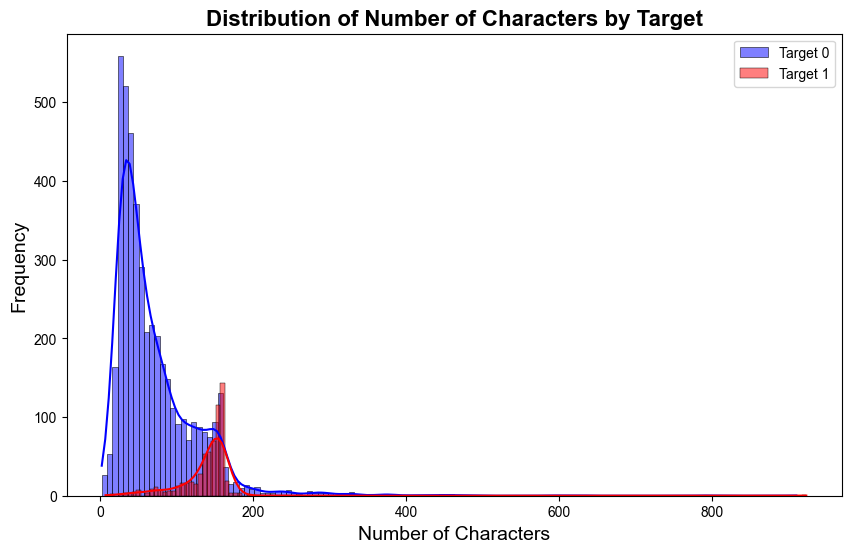

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


Word Count Distribution for Legitimate and Spam Messages

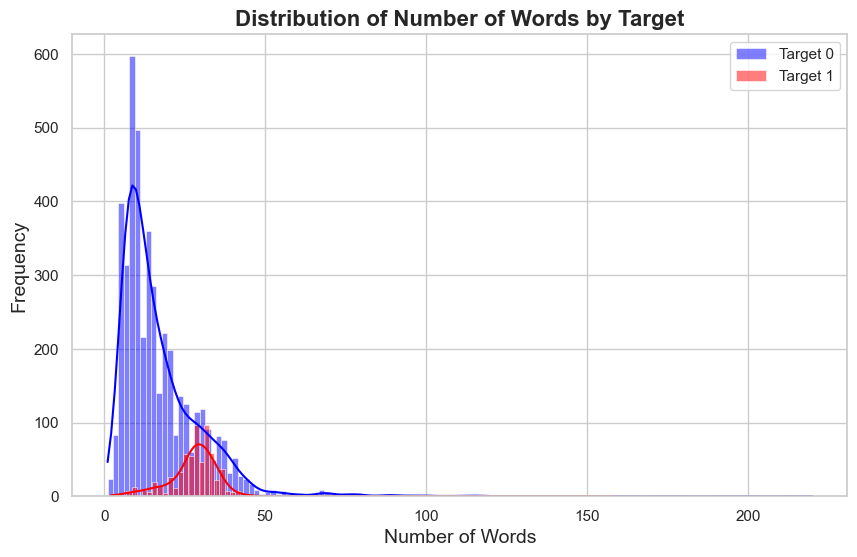

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


Pairplot for Data Visualization

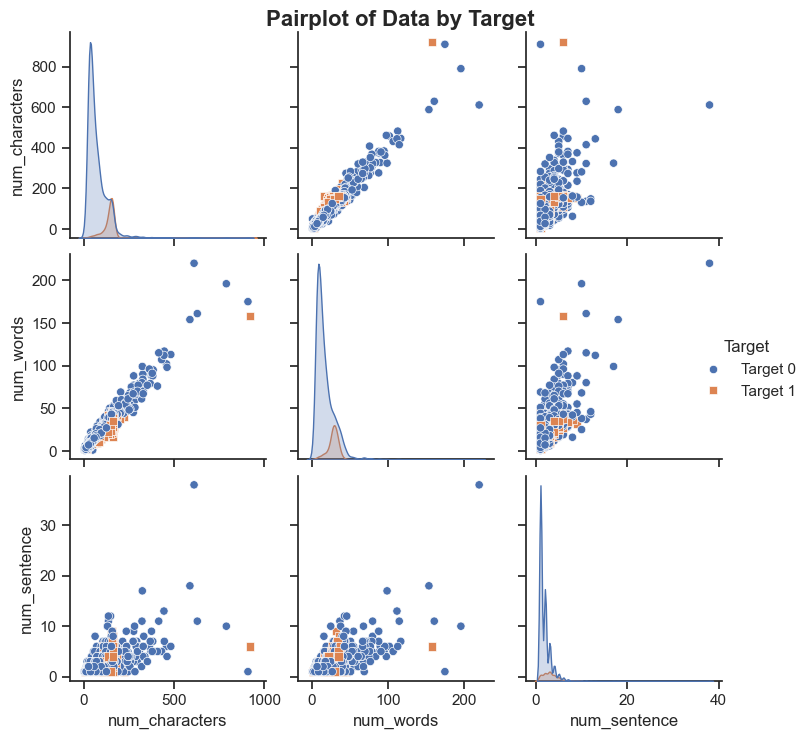

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()


Coorelation

In [22]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.375552,0.258833,0.260077
num_characters,0.375552,1.000000,0.965534,0.617237
num_words,0.258833,0.965534,1.000000,0.677505
num_sentence,0.260077,0.617237,0.677505,1.000000


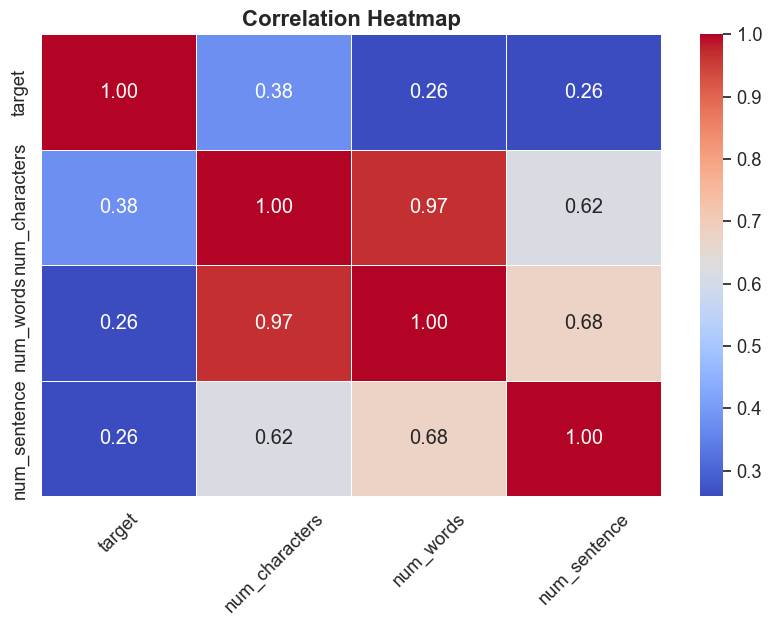

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()


<h1>Data Preprocessing</h1>

In [24]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)


In [25]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

Creating a New Column: 'transformed_text'

In [26]:
df['transformed_text'] = df['text'].apply(transform_text)

In [27]:
df.head(5) 

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Celebrate Valentine Day with B1G1 Offer ! Val...,923,158,6,celebr valentin day b1g1 offer valid till 20 f...
2,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
4,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


Word Cloud for Spam Messages

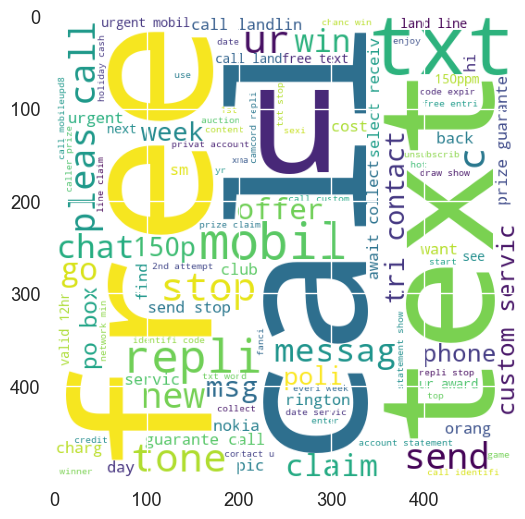

In [28]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

Word Cloud for Not spam Messages

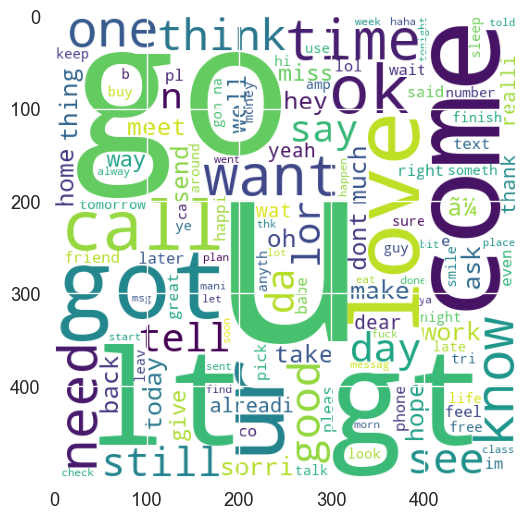

In [29]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

Find top 30 words of spam

In [30]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)
spam_carpos

['celebr',
 'valentin',
 'day',
 'b1g1',
 'offer',
 'valid',
 'till',
 '20',
 'feb',
 '2024',
 'congrat',
 '4',
 'profound',
 'train',
 'student',
 'got',
 'place',
 'polymorph',
 'infotech',
 'pune',
 'happi',
 'inform',
 'profound',
 'train',
 'student',
 'got',
 'place',
 'polymorph',
 'infotech',
 'pune',
 'campu',
 'arrang',
 'profound',
 'edutech',
 'pune',
 'post',
 'java',
 'develop',
 'locat',
 'pune',
 'salari',
 'rs',
 '3',
 'lpa',
 '3',
 'month',
 'probat',
 'period',
 'list',
 'select',
 'student',
 'chetan',
 'jayram',
 'mahajan',
 'cs',
 '2023',
 'ssbt',
 'coet',
 'bambhori',
 'jalgaon',
 'shankar',
 'ramchandra',
 'madan',
 'cs',
 '2023',
 'fabtech',
 'technic',
 'campu',
 'colleg',
 'engin',
 'sangola',
 'shubham',
 'suresh',
 'suryawanshi',
 'btech',
 'civil',
 '2023',
 'karmav',
 'bhaurao',
 'patil',
 'colleg',
 'engin',
 'satara',
 'vishwajeet',
 'dattatray',
 'shind',
 'btech',
 'mechan',
 '2022',
 'bharati',
 'vidhyapeeth',
 'colleg',
 'engin',
 'kolhapur',
 'hear

In [31]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(20))
filter_df

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,114
7,mobil,110
8,stop,108
9,repli,103


In [32]:
import pandas as pd

def calculate_matching_percentage(sentence, dataframe):
    """
    Calculate the percentage of matching words between a sentence and a DataFrame with weights.

    Args:
        sentence (str): The input sentence.
        dataframe (pd.DataFrame): The DataFrame with columns '0' for words and '1' for weights.

    Returns:
        float: The percentage of matching words based on weights.
    """
    # Tokenize the sentence into words
    sentence_words = sentence.lower().split()

    # Calculate the percentage of matching words with weights
    total_weight = dataframe[1].sum()
    matching_weight = sum(dataframe[dataframe[0].isin(sentence_words)][1])

    percentage_matching = (matching_weight / total_weight) * 100

    return percentage_matching

# Example usage




In [33]:
sentence =  "can i call u free gift for you txt text mobile stop"
sentence = transform_text(sentence)

result = calculate_matching_percentage(sentence, filter_df)
result

50.29995385325334

10 - 25 then Low Level
26 - 75 then Low Level
76 - 100 then Low Level

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_25316\2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


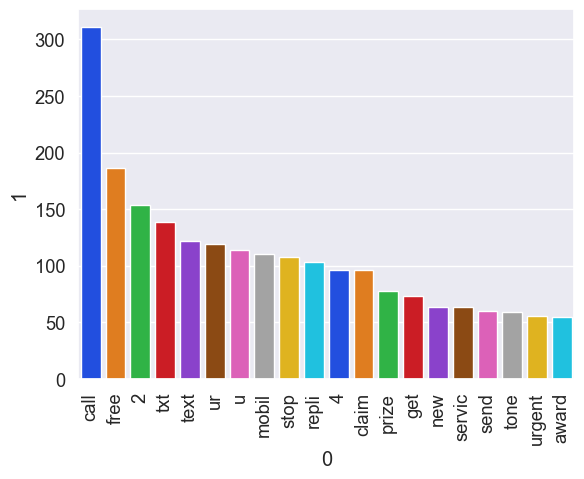

In [34]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

Find top 30 words of Not spam Messages

In [35]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [36]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_25316\699915630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


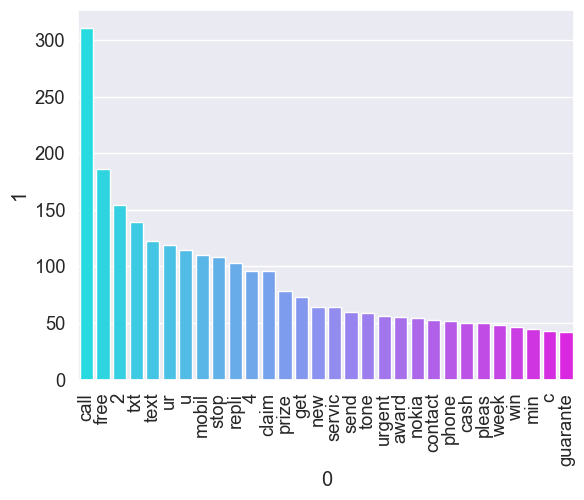

In [37]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

Model Building

Initializing CountVectorizer and TfidfVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

Dependent and Independent Variable

In [39]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values


In [40]:
def CreateDataFrameForClassification(olfDf , text  , target ):
    olfDf['num_characters'][0] = len(text)
    olfDf['num_words'][0] = len(nltk.word_tokenize(text))
    olfDf['num_sentence'][0] = len(nltk.sent_tokenize(text)) 
    olfDf['target'][0] = len(nltk.sent_tokenize(target)) 
    return olfDf
       



Split into Train and Test Data

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

Import the Models

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

Initialize the Models

In [43]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)


    

Dictionary of the Models

In [44]:
clfsList = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

Train the Models

In [45]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

Evaluate the Models

In [46]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfsList.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    


For:  SVC
Accuracy:  0.9786821705426356
Precision:  0.9583333333333334

For:  KNN
Accuracy:  0.9118217054263565
Precision:  1.0

For:  NB
Accuracy:  0.9806201550387597
Precision:  1.0

For:  DT
Accuracy:  0.9408914728682171
Precision:  0.8380952380952381

For:  LR
Accuracy:  0.9534883720930233
Precision:  0.9375

For:  RF
Accuracy:  0.9748062015503876
Precision:  0.9818181818181818


c:\Users\VAISHNAVI\Desktop\Email spam\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



For:  Adaboost
Accuracy:  0.9612403100775194
Precision:  0.9181818181818182


The SVM( support Vector Machine) has Highest accuracy 97.5% 

In [ ]:
import joblib
svc.fit(X,y)
y_pred = svc.predict(X_test)
joblib.dump(svc , "TrainedModel.pkl")
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.9835271317829457